# This notebook is to test the GARCH model on the IV data and see how well it can predict the future IV based on the past IV

In [17]:
from random import gauss
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# GARCH(2,2) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [18]:
current_dir = os.getcwd()
pickle_path = os.path.join(current_dir, 'data')



In [19]:
average_iv = pd.read_pickle(os.path.join(pickle_path,'average_iv_series_with_date_nasdaq100.pkl'))


In [20]:
len(average_iv_series)

1258

Text(0.5, 1.0, 'Sp500 historic IV')

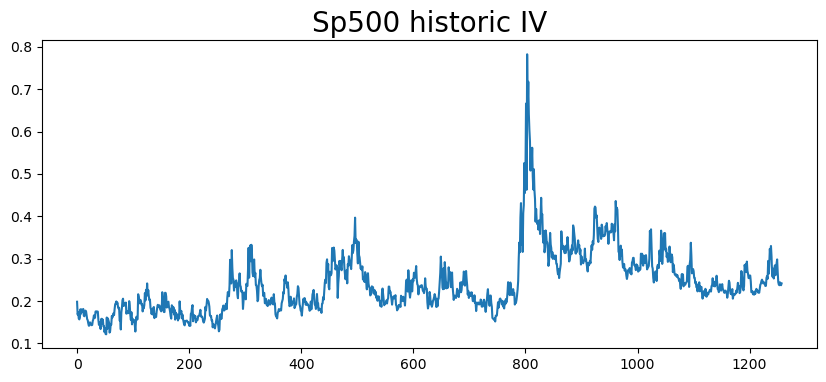

In [21]:
plt.figure(figsize=(10,4))
plt.plot(average_iv_series)
plt.title('Sp500 historic IV', fontsize=20)

# PACF Plot

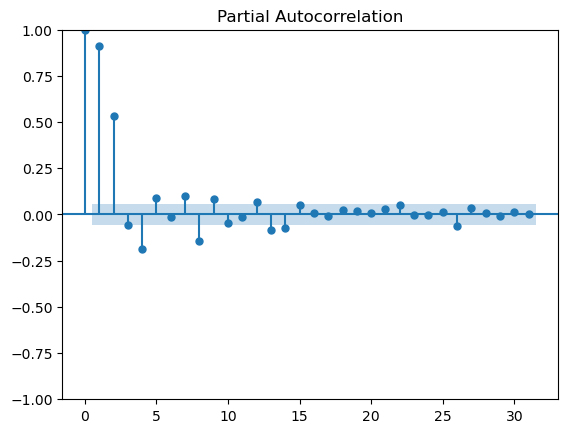

In [22]:
plot_pacf(np.array(average_iv_series)**2)  # to see the p value for the GARCH model
plt.show()

# Fit the GARCH Model

In [32]:
train, test = 10*average_iv_series[:1150],10*average_iv_series[1150:]

In [49]:
model = arch_model(train, p=300,q=0)

In [ ]:
model_fit = model.fit()

In [ ]:
model_fit.summary()

# Predict

# Rolling Forecast Origin

In [56]:
rolling_predictions = []
rolling_window_size = 252

for start in range(len(average_iv) - rolling_window_size):
    train, test = average_iv[start:start+rolling_window_size], average_iv[start+rolling_window_size]
    train, test = 100 * train, 100 * test

    model = arch_model(train, vol='GARCH', p=6, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

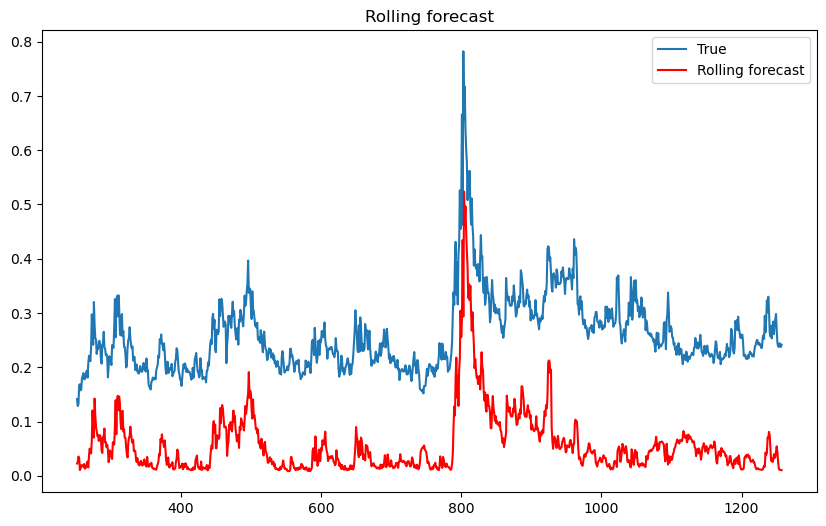

In [57]:
rolling_predictions = pd.Series(rolling_predictions, index=average_iv.index[rolling_window_size:])
#plotting the rolling forecast
plt.figure(figsize=(10, 6))
plt.plot(average_iv[rolling_window_size:], label='True')
plt.plot(rolling_predictions/100, color='red', label='Rolling forecast')
plt.title('Rolling forecast')
plt.legend()
plt.show()

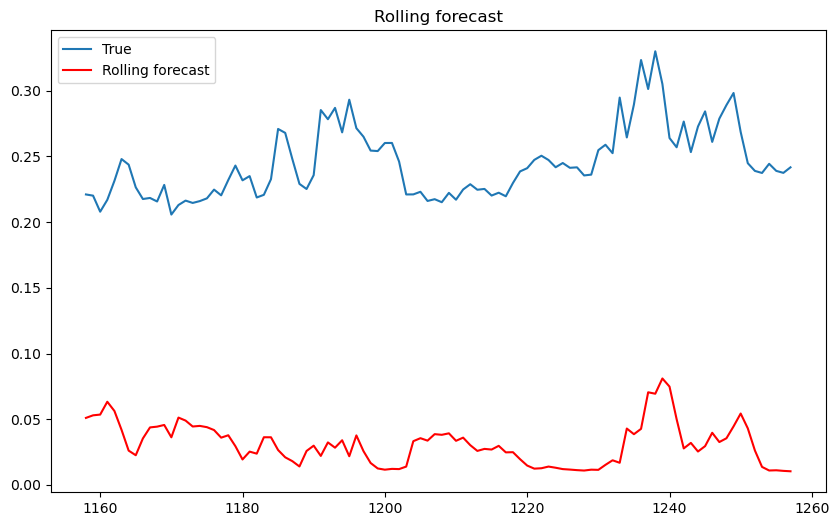

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(average_iv[-100:], label='True')
plt.plot(rolling_predictions[-100:]/100 , color='red', label='Rolling forecast')
plt.title('Rolling forecast')
plt.legend()

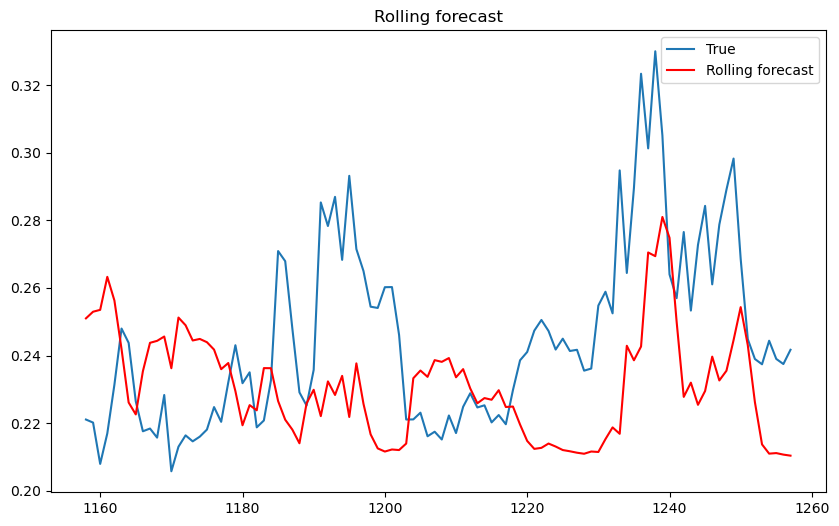

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(average_iv[-100:], label='True')
plt.plot(rolling_predictions[-100:]/100 +0.2 , color='red', label='Rolling forecast')
plt.title('Rolling forecast')
plt.legend()

In [ ]:
# Not sure why Garchmodel consistently  predicts  lower than true